# DataMadness
## EDA (fancy plots)

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 18
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [56]:
db = pd.read_csv('db_clean/titles.csv')

In [57]:
db = db[db['startYear'] < 2023]

In [58]:
db['sex'] = 'male'
db.loc[db['primaryProfession'].str.contains('actress'), 'sex'] = 'female'
db.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,replicas,regions,nconst,primaryName,birthYear,deathYear,primaryProfession,averageRating,numVotes,sex
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"['Comedy', 'Fantasy', 'Romance']",41.0,"['IT', 'FR', 'ES', 'PT', 'ZA', 'PL', 'BG', 'GB...",nm0126330,Josephine Byrnes,1966,2024,actress,6.4,86095,female
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"['Comedy', 'Fantasy', 'Romance']",41.0,"['IT', 'FR', 'ES', 'PT', 'ZA', 'PL', 'BG', 'GB...",nm0211306,Reed De Rouen,1921,1986,"actor,writer,miscellaneous",6.4,86095,male
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"['Comedy', 'Fantasy', 'Romance']",41.0,"['IT', 'FR', 'ES', 'PT', 'ZA', 'PL', 'BG', 'GB...",nm0235800,Cyril Dowler,1906,1986,actor,6.4,86095,male
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"['Comedy', 'Fantasy', 'Romance']",41.0,"['IT', 'FR', 'ES', 'PT', 'ZA', 'PL', 'BG', 'GB...",nm0360800,Geoff Hansen,1951,2015,"actor,cinematographer,director",6.4,86095,male
4,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"['Comedy', 'Fantasy', 'Romance']",41.0,"['IT', 'FR', 'ES', 'PT', 'ZA', 'PL', 'BG', 'GB...",nm0700947,Aly Purrott-Armstrong,1983,2024,actress,6.4,86095,female
5,tt0064994,movie,Larks on a String,Skrivánci na niti,0,1990,1990,94,"['Comedy', 'Drama', 'Romance']",27.0,"['FI', 'ES', 'XWW', 'BG', 'JP', 'PT', 'US', 'D...",nm0294143,Marinda French,1934,2024,actress,7.4,2036,female
6,tt0064994,movie,Larks on a String,Skrivánci na niti,0,1990,1990,94,"['Comedy', 'Drama', 'Romance']",27.0,"['FI', 'ES', 'XWW', 'BG', 'JP', 'PT', 'US', 'D...",nm0570570,Tim McInnerny,1956,2024,actor,7.4,2036,male
7,tt0064994,movie,Larks on a String,Skrivánci na niti,0,1990,1990,94,"['Comedy', 'Drama', 'Romance']",27.0,"['FI', 'ES', 'XWW', 'BG', 'JP', 'PT', 'US', 'D...",nm0578833,Stephen Mendel,1953,2024,"actor,soundtrack",7.4,2036,male
8,tt0064994,movie,Larks on a String,Skrivánci na niti,0,1990,1990,94,"['Comedy', 'Drama', 'Romance']",27.0,"['FI', 'ES', 'XWW', 'BG', 'JP', 'PT', 'US', 'D...",nm0707536,Jim Rakete,1951,2024,"actor,camera_department,director",7.4,2036,male
9,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,2018,122,['Drama'],22.0,"['AR', 'ES', 'GR', 'FR', 'KR', 'VE', 'CA', 'JP...",nm0467864,Jan Kotva,1943,1993,actor,6.7,7576,male


In [59]:
byYear = db.groupby('startYear').agg({
    'averageRating':'mean',
    'numVotes':'sum',
    'sex': lambda e: [sum(e == 'male'), sum(e =='female')]
})
byYear['males'] = byYear['sex'].apply(lambda e: e[0])
byYear['females'] = byYear['sex'].apply(lambda e: e[1])
byYear

,averageRating,numVotes,sex,males,females
startYear,,,,,
1980,6.812573,42534973,"[327, 190]",327,190
1981,6.694089,17457179,"[390, 236]",390,236
1982,6.910851,29352702,"[375, 224]",375,224
1983,6.680282,43068604,"[314, 183]",314,183
1984,6.790568,47446146,"[501, 273]",501,273
1985,6.577354,49019870,"[513, 273]",513,273
1986,6.571041,36566122,"[413, 250]",413,250
1987,6.642010,46393003,"[537, 289]",537,289
1988,6.722254,43524743,"[447, 263]",447,263


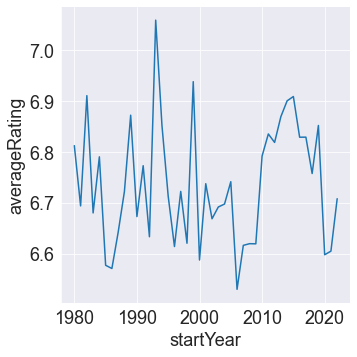

In [60]:
sns.relplot(x='startYear', y='averageRating', data=byYear, kind='line')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

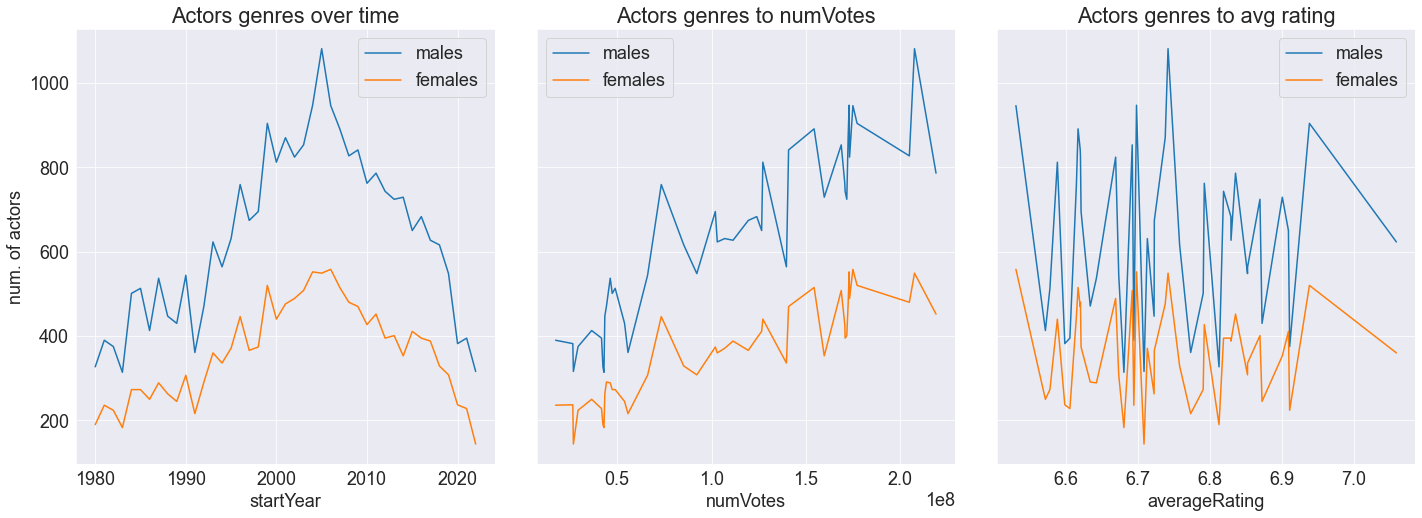

In [61]:
fig, axs = plt.subplots(ncols=3, sharey='row', figsize=(24,8))
sns.lineplot(x='startYear', y='males', data=byYear, ax=axs[0])
sns.lineplot(x='startYear', y='females', data=byYear, ax=axs[0])
axs[0].legend(['males','females'])
axs[0].set_ylabel('num. of actors')
axs[0].set_title('Actors genres over time')


sns.lineplot(x='numVotes', y='males', data=byYear, ax=axs[1])
sns.lineplot(x='numVotes', y='females', data=byYear, ax=axs[1])
axs[1].legend(['males','females'])
axs[1].set_ylabel('num. of actors')
axs[1].set_title('Actors genres to numVotes')

sns.lineplot(x='averageRating', y='males', data=byYear, ax=axs[2])
sns.lineplot(x='averageRating', y='females', data=byYear, ax=axs[2])
axs[2].legend(['males','females'])
axs[2].set_ylabel('num. of actors')
axs[2].set_title('Actors genres to avg rating')

plt.subplots_adjust(wspace=0.1)
plt.tight_layout

In [62]:
db.shape

(42844, 19)

<AxesSubplot:xlabel='averageRating', ylabel='sex'>

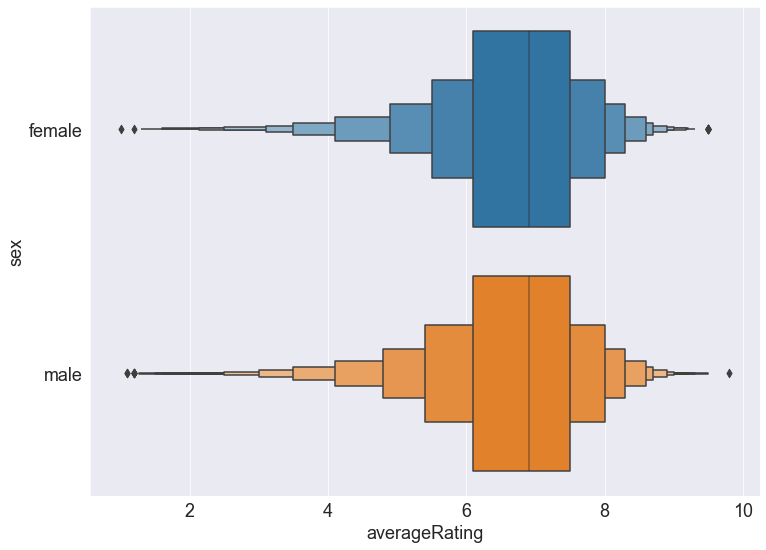

In [63]:
sns.boxenplot(data=db, x='averageRating', y='sex')

### Distribution of Average Rating variable
The variable we want to get insights on

C:\Users\ignacio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ignacio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


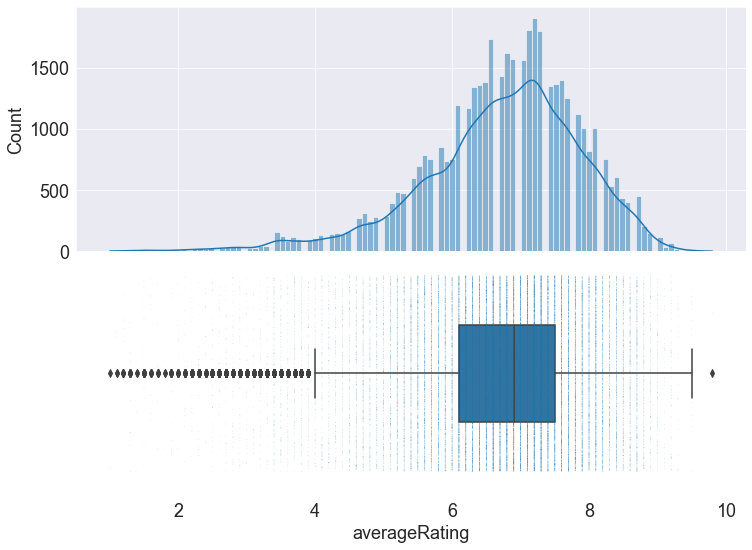

In [64]:
fig1, axs = plt.subplots(nrows=2)

sns.histplot(db['averageRating'], kde=True, ax=axs[0])
sns.stripplot(db['averageRating'], orient='h', jitter=0.4, size=.8, ax=axs[1], alpha=0.2)
sns.boxplot(db['averageRating'], orient='h', width=0.4, ax=axs[1], showfliers=True)

spacer = np.max(db['averageRating']) * 0.05
xmin = np.min(db['averageRating']) - spacer
xmax = np.max(db['averageRating']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

plt.subplots_adjust(hspace=0)
axs[1].set_facecolor('white')

#### Compare to Number of Votes

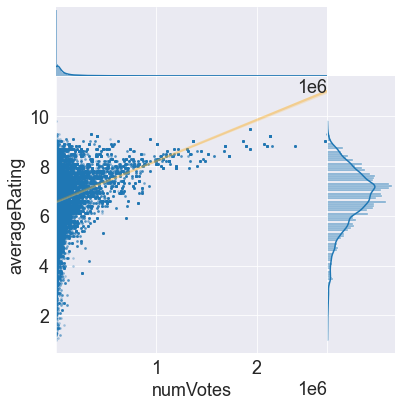

In [65]:
sns.jointplot(
    x='numVotes', y='averageRating', data=db, kind="reg", ratio=4, space=0,
    scatter_kws={'s': 3,'alpha': 0.25}, line_kws={'color': 'orange', 'alpha':0.3}
)

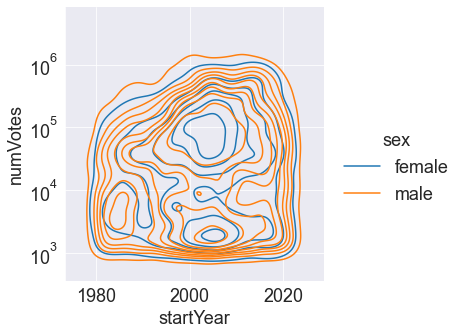

In [66]:
sns.displot(db, x='startYear', y='numVotes', hue='sex', kind='kde', log_scale=(False,True))

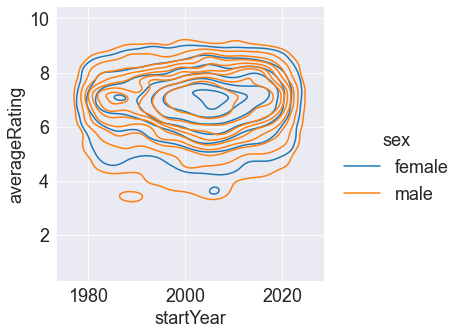

In [67]:
sns.displot(db, x='startYear', y='averageRating', hue='sex', kind='kde')

In [68]:
regions = db[['tconst', 'regions', 'averageRating', 'numVotes']].groupby('tconst').agg('first')
dictz = {
    '[':'',
    ']':'',
    '\'':''
}
for k,v in dictz.items():
    regions.regions = regions['regions'].str.replace(k, v)

regions.regions = regions['regions'].str.split(',')
regions = regions.explode('regions')
byRegion = regions.groupby('regions').agg(
    {'averageRating': 'mean', 'numVotes': 'sum'}
).reset_index().sort_values('numVotes', ascending=False)
byRegion.head(30)

<ipython-input-68-f088f39e6345>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  regions.regions = regions['regions'].str.replace(k, v)


,regions,averageRating,numVotes
54,IN,6.812498,1736237633
19,CA,6.611367,1705021928
121,US,6.474399,1662061088
60,JP,6.630938,1270397880
45,GR,6.466347,1252148510
39,ES,6.533873,1044597694
32,DE,6.529794,935163825
40,FI,6.594438,929676955
16,BR,6.496911,927067056
42,GB,6.504845,913642768


In [69]:
len(byRegion.regions.unique())

243

votes come from 243 different regions

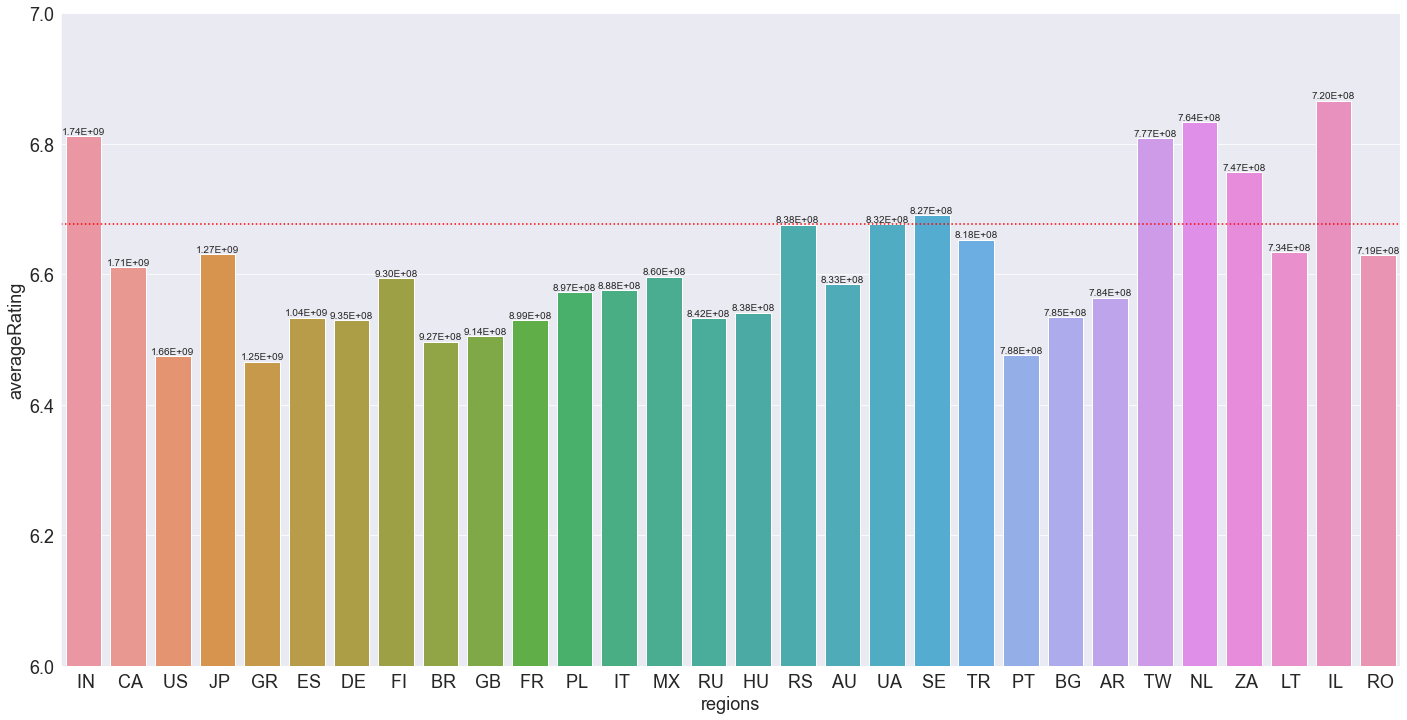

In [70]:
fig, ax = plt.subplots(figsize=(24, 12))
sns.barplot(x='regions', y='averageRating', data = byRegion.head(30), ax=ax)
ax.axhline(y=byRegion['averageRating'].median(), color='red', linestyle='dotted')
ax.set_ylim((6,7))

for i,patch in enumerate(ax.patches):
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    tick = ax.xaxis.get_majorticklabels()[i].get_text()
    votes = int(byRegion[byRegion['regions'] == tick].numVotes)
    ax.annotate(f'{votes:.2E}', (x.mean(), y), ha='center', va='bottom', size=10)


## Region
Display categorical region value together with the count of averageRating labels to determine which region has higher rate of vote in the db, then compare it to the average rating of the region itself.

### Correlation of numeric variables
This shows averageRating being correlated to numVotes which makes sense, and startYear to endYear (again understandable).
Small correlation also between runtimeMinutes and averageRating: *investigate*

<AxesSubplot:>

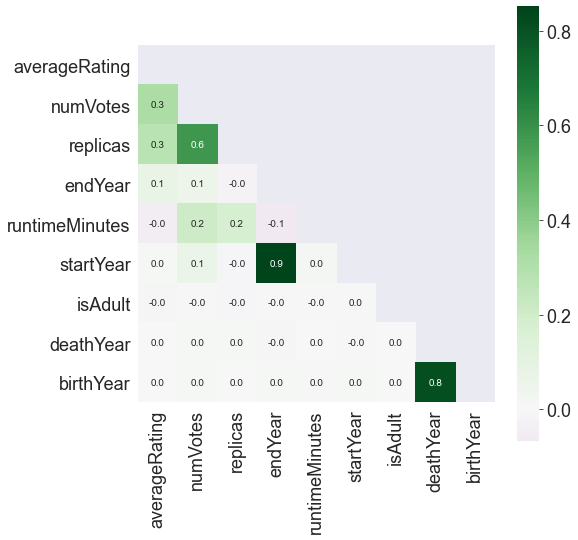

In [71]:
dset = db
s = dset.corr().loc[:, 'averageRating'].abs().sort_values(ascending=False)
s = dset.loc[:, list(s.index)].corr()
mask = np.zeros_like(s)
mask[np.triu_indices_from(mask)] = 1
plt.figure(figsize=(8, 8))
sns.heatmap(s, mask=mask, square=True, cmap='PRGn', center=0, robust=True, annot=True, annot_kws={"size":10}, fmt='.1f')

### pairplot for numerical variables

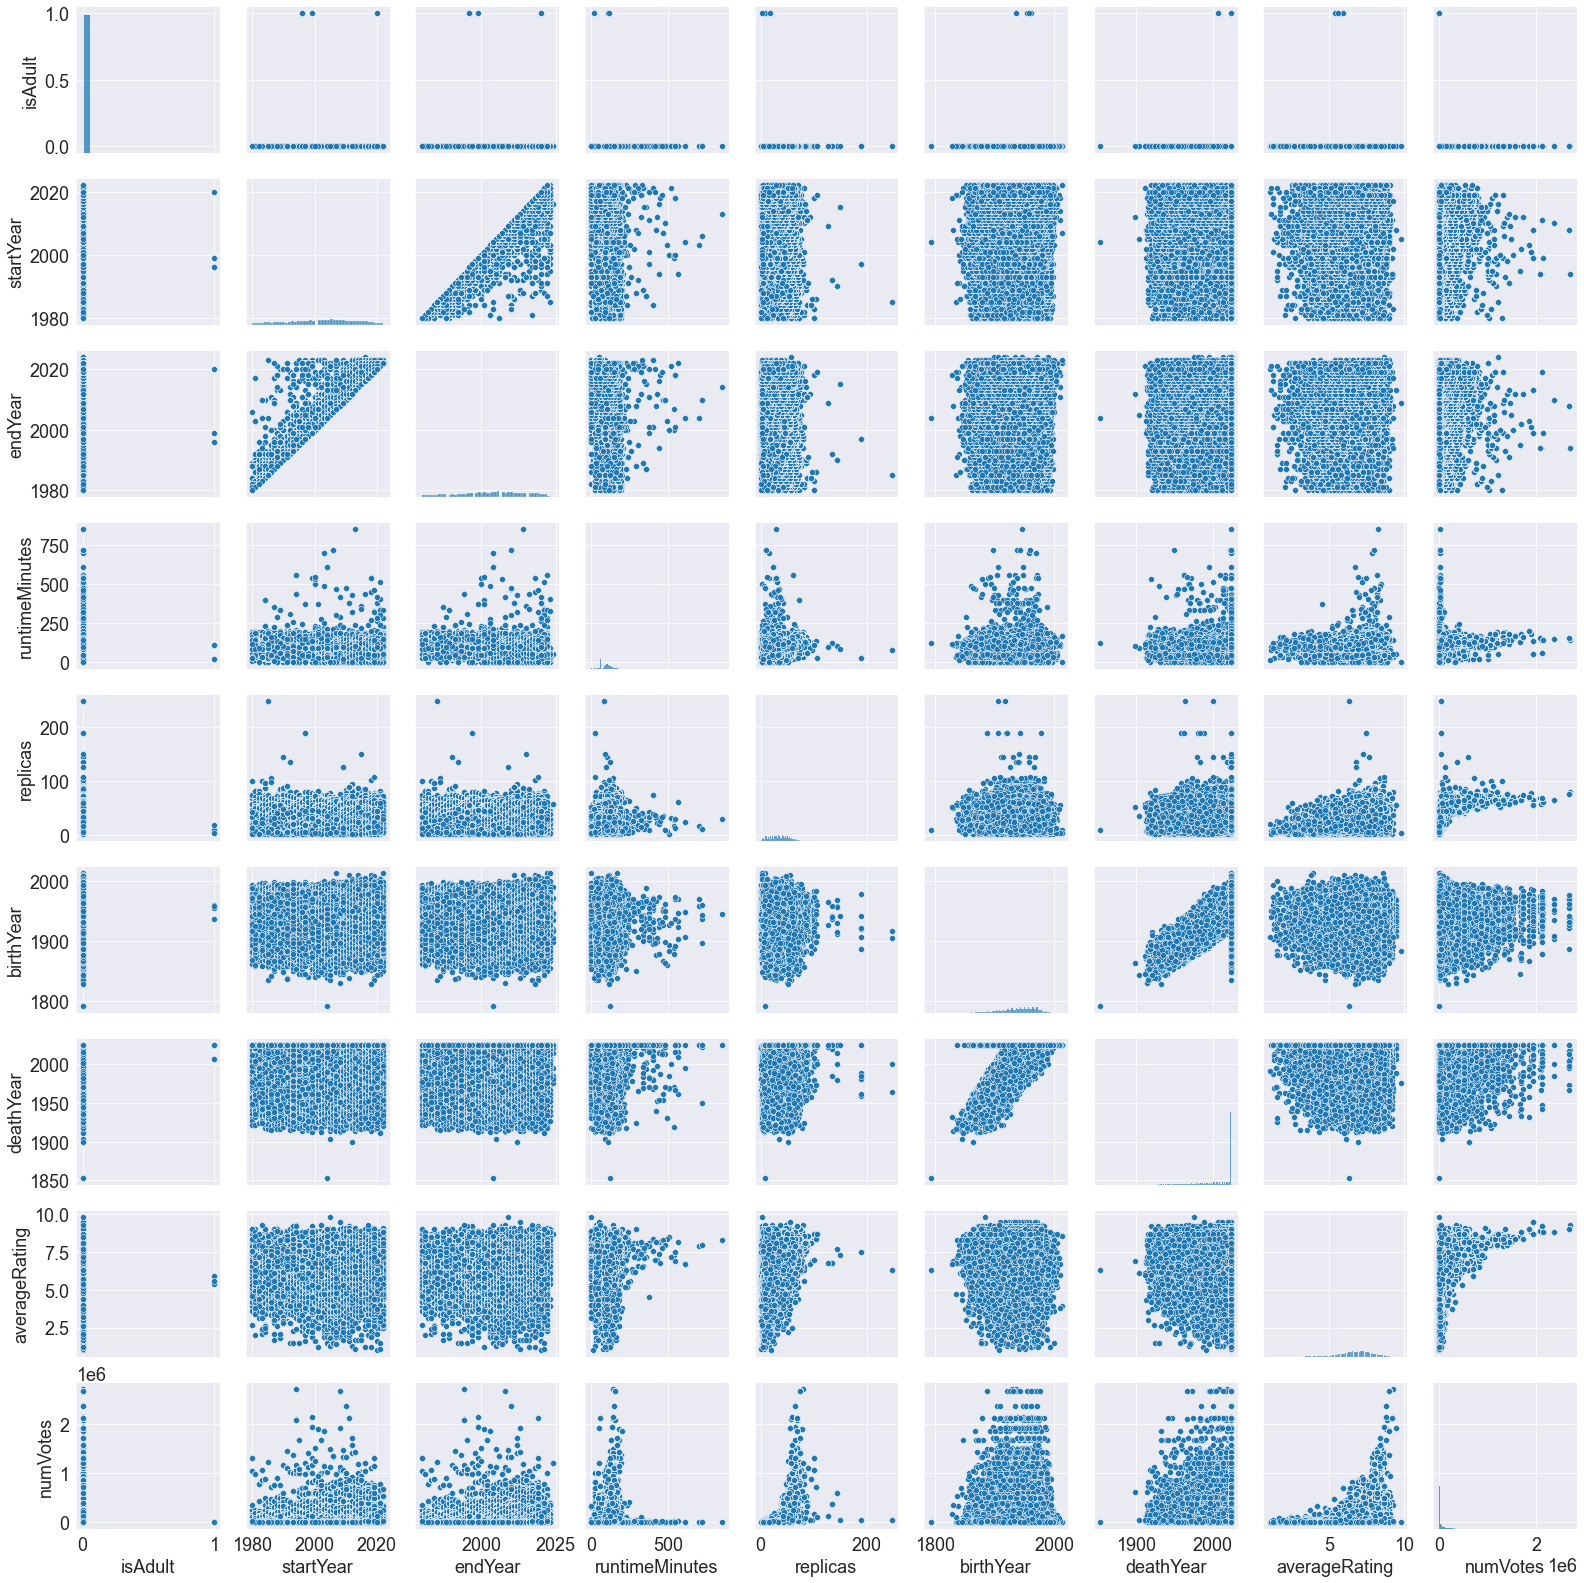

In [72]:
numeric = db.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
sns.pairplot(numeric)

### Most recurrent titles
series with high number of episodes, or movies with many replicas

In [73]:
aggregator = {'replicas':'max','averageRating':'mean', 'numVotes':'sum', 'startYear':'first'}
byReplicas = db.groupby('primaryTitle').agg(aggregator).sort_values('replicas', ascending = False)
byReplicas.head(25)

,replicas,averageRating,numVotes,startYear
primaryTitle,,,,
The Black Cauldron,247.0,6.300000,75342,1985
Pokémon,189.0,7.500000,310107,1997
Shaun the Sheep Movie,149.0,7.300000,41588,2015
Home Alone,144.0,7.700000,3591072,1990
Home Alone 2: Lost in New York,134.0,6.800000,1855460,1992
A Christmas Carol,126.0,7.342857,306167,1984
Demon Slayer: Kimetsu no Yaiba,106.0,8.700000,218462,2019
Aliens,105.0,8.400000,6521517,1986
Ralph Breaks the Internet,101.0,7.000000,663592,2018


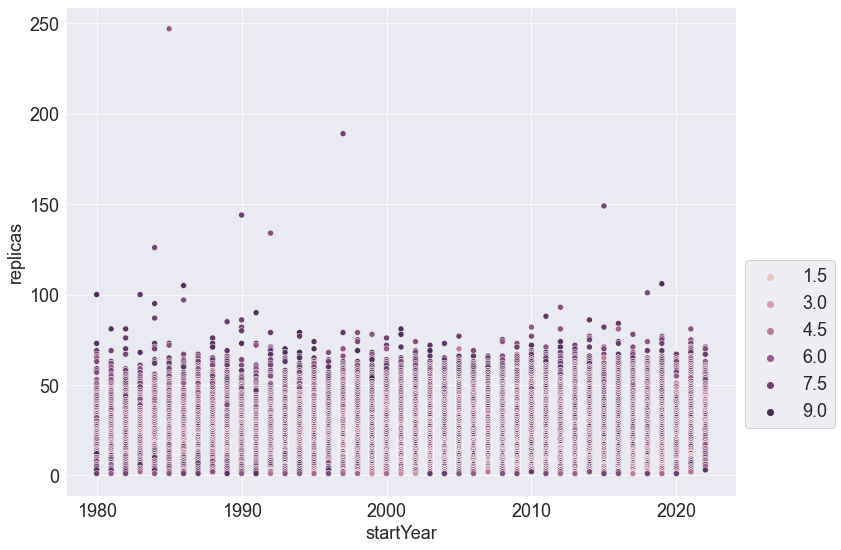

In [74]:
sns.cubehelix_palette(n_colors=6, light=0.5)
sns.scatterplot(x='startYear', y='replicas', hue='averageRating', data=byReplicas)
plt.legend(bbox_to_anchor=(1,0.5))

### Top-rated titles
titles where averageRating is the highest

In [75]:
aggregator = {'tconst':'first', 'startYear':'first','averageRating':'mean','numVotes':'sum'}
bestMovies = db.groupby('primaryTitle').agg(aggregator).reset_index().sort_values('averageRating', ascending=False)
bestMovies.head(20)

,primaryTitle,tconst,startYear,averageRating,numVotes
2584,Choufli Hal,tt7151672,2005,9.8,2589
2099,Breaking Bad,tt0903747,2008,9.5,28940595
9347,Pretenders,tt0316613,2002,9.3,10054
13660,The Shawshank Redemption,tt0111161,1994,9.3,5412706
12758,The Joy of Painting,tt0383795,1983,9.3,5614
14075,The Wire,tt0306414,2002,9.3,4843342
8822,Otvorena vrata,tt0191714,1994,9.2,8130
4712,Game of Thrones,tt0944947,2011,9.2,57507678
13718,The Sopranos,tt0141842,1999,9.2,13571976
7006,Leyla and Mecnun,tt1831164,2011,9.1,472335


### Top-rated actors
based on movie ratings

In [76]:
top_actors = db.groupby(['tconst']).aggregate({
    'primaryName':lambda e: ', '.join(e.unique()),
    'primaryTitle':lambda e: ', '.join(e.unique()),
    'startYear': 'min',
    'averageRating':'max',
    'numVotes':'max'
})

In [77]:
top_actors.sort_values('averageRating',ascending=False).head(20)

,primaryName,primaryTitle,startYear,averageRating,numVotes
tconst,,,,,
tt7151672,William Austin,Choufli Hal,2005,9.8,2589
tt0903747,"Catarina Abdalla, Juli Cantó, Igor Cavalera, M...",Breaking Bad,2008,9.5,1929373
tt0383795,Barry Sobel,The Joy of Painting,1983,9.3,5614
tt9471404,Wanda Luczycka,The Chosen,2017,9.3,33291
tt0316613,"Emil Bruun, Tat-Ming Cheung",Pretenders,2002,9.3,5027
tt0111161,"Burt Reynolds, Mary Langan",The Shawshank Redemption,1994,9.3,2706353
tt0306414,"Hans Abich, Alex Barad, Philip L. Boddy, Elio,...",The Wire,2002,9.3,345953
tt0157217,"Bill Goodwin, René Pape",Byomkesh Bakshi,1993,9.2,3025
tt0191714,"Maks Furijan, Terry Rangno",Otvorena vrata,1994,9.2,4065


In [78]:
top_actors.sort_values('numVotes' , ascending=False).head(20)

,primaryName,primaryTitle,startYear,averageRating,numVotes
tconst,,,,,
tt0111161,"Burt Reynolds, Mary Langan",The Shawshank Redemption,1994,9.3,2706353
tt0468569,"Sela Ward, Robert Carradine, Troy Donahue, Ton...",The Dark Knight,2008,9.0,2679814
tt1375666,"Timothy Hutton, Laura Gemser, Don Buchsbaum, T...",Inception,2010,8.8,2377823
tt0137523,"Brian Robbins, Liz Torres, Tânia Gomide, Edgar...",Fight Club,1999,8.8,2150874
tt0944947,"Ben Chaplin, Wilda Bieber, Mikhail Bolduman, A...",Game of Thrones,2011,9.2,2129914
tt0109830,"Colm Meaney, Kerim Afsar, Luis Alcoriza, Kurti...",Forrest Gump,1994,8.8,2102744
tt0110912,"George Peppard, Victoria Principal, Barbara Ba...",Pulp Fiction,1994,8.9,2077780
tt0133093,"Ian Abercrombie, Persis Khambatta, Patrick Mul...",The Matrix,1999,8.7,1931124
tt0903747,"Catarina Abdalla, Juli Cantó, Igor Cavalera, M...",Breaking Bad,2008,9.5,1929373


# HOW GENRE POPULARITY CHANGED OVER TIME
We can visualize the popularity of genres for every year since 1930 till today. We will do this by making an area chart.

In [90]:
aggregator = {'tconst':'first', 'startYear':'first','averageRating':'mean','numVotes':'first','genres':'first'}
movie_genres = db.groupby('primaryTitle').agg(aggregator).reset_index()
movie_genres.head()

,primaryTitle,tconst,startYear,averageRating,numVotes,genres
0,(T)Raumschiff Surprise - Periode 1,tt0349047,2004,5.4,16032,"['Comedy', 'Sci-Fi']"
1,*batteries not included,tt0092494,1987,6.6,36314,"['Comedy', 'Family', 'Fantasy']"
2,.45,tt0259822,2006,5.5,8694,"['Crime', 'Drama', 'Thriller']"
3,.hack//SIGN,tt0361140,2002,6.8,1357,"['Action', 'Adventure', 'Animation']"
4,00 Schneider - Im Wendekreis der Eidechse,tt2416424,2013,5.7,1252,['Comedy']


In [91]:
# Here we count the number of occurrences of each genre per year
def count_word_occurrences(s):
    word_counts = {}
    s = s[1:len(s)-1]
    words = s.split(', ')
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

# Group the dataframe by decade and apply the function to count the word occurrences
final_counts = []
grouped_by_decade = movie_genres.groupby((movie_genres['startYear']))
for year, group in grouped_by_decade:
    total_word_counts = {}
    for word_counts in group['genres'].apply(lambda x: count_word_occurrences(x)):
        for word, count in word_counts.items():
            if word in total_word_counts:
                total_word_counts[word] += count
            else:
                total_word_counts[word] = count
    sorted_word_counts = dict(sorted(total_word_counts.items(), key=lambda item: item[1], reverse=True))
    final_counts.append(sorted_word_counts)

In [92]:
# Convert the dictionaries to dataframes and stack them
dfs_by_year = [pd.DataFrame.from_dict(d, orient='index', columns=[f'{year}']) for year, d in enumerate(final_counts, start=1980)]
df_stacked = pd.concat(dfs_by_year, axis=1)
df_stacked = df_stacked.fillna(0)
df_normed = df_stacked.div(df_stacked.sum(axis=0), axis=1)

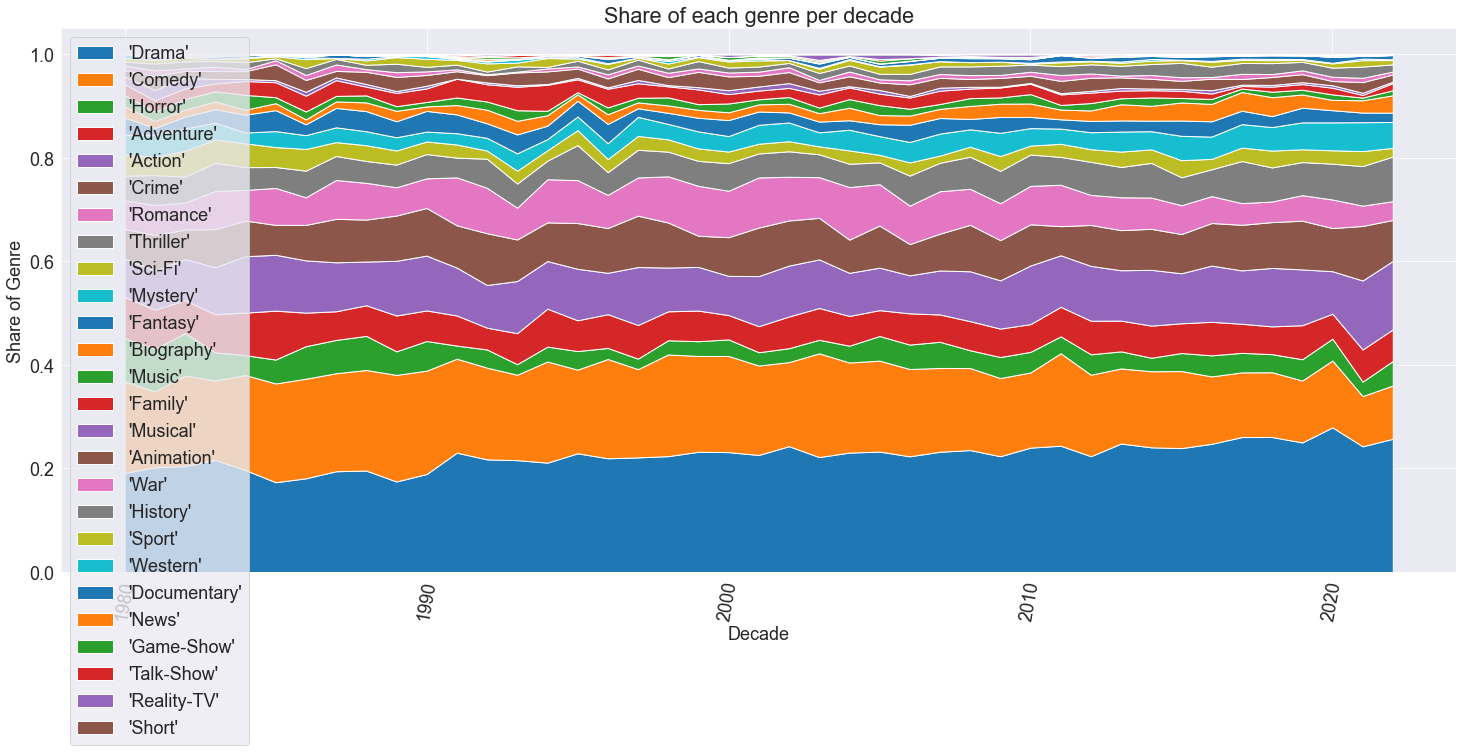

In [93]:
# Create stacked band plot
plt.figure(figsize=(25, 10))
plt.stackplot(df_normed.columns, df_normed.values, labels=df_normed.index)
# Add legend and axis labels
plt.legend(loc='upper left')
plt.xlabel('Decade')
plt.ylabel('Share of Genre')
plt.title('Share of each genre per decade')
plt.xticks(df_normed.columns[0::10],rotation = 80)
# Show the plot
plt.show()

The evolution of movie genres over time is a fascinating subject that sheds light on the shifting tastes and interests of audiences. While some genres have remained perennially popular, such as drama and romance, others have risen to prominence and then faded away. For example, action and horror films have enjoyed a surge in popularity since the 1970s,which was fueled by advances in special effects and a growing appetite for high-octane, adrenaline-fueled entertainment. Another example is film noir, a brief but influential trend that emerged in the 1940s, it is a dark and moody genre that reflected the anxieties and uncertainties of the time.

# THE RELATIONSHIP BETWEEN GENRE AND RATINGS
To study how the distribution of ratings for each genre we can create a boxplot for each one.

In [94]:
genres = pd.DataFrame(columns = ['genre1', 'genre2', 'genre3','rating'])
genres[['genre1', 'genre2', 'genre3']] = movie_genres['genres'].str.split(',', expand=True)
genres['rating'] = movie_genres.averageRating

genres['genre1'] = genres['genre1'].map(lambda x: x.lstrip('[').rstrip(']') if x is not None else x)
genres['genre2'] = genres['genre2'].map(lambda x: x.lstrip(' ').rstrip(']') if x is not None else x)
genres['genre3'] = genres['genre3'].map(lambda x: x.lstrip(' ').rstrip(']') if x is not None else x)
genres.head()

,genre1,genre2,genre3,rating
0,'Comedy','Sci-Fi',None,5.4
1,'Comedy','Family','Fantasy',6.6
2,'Crime','Drama','Thriller',5.5
3,'Action','Adventure','Animation',6.8
4,'Comedy',None,None,5.7


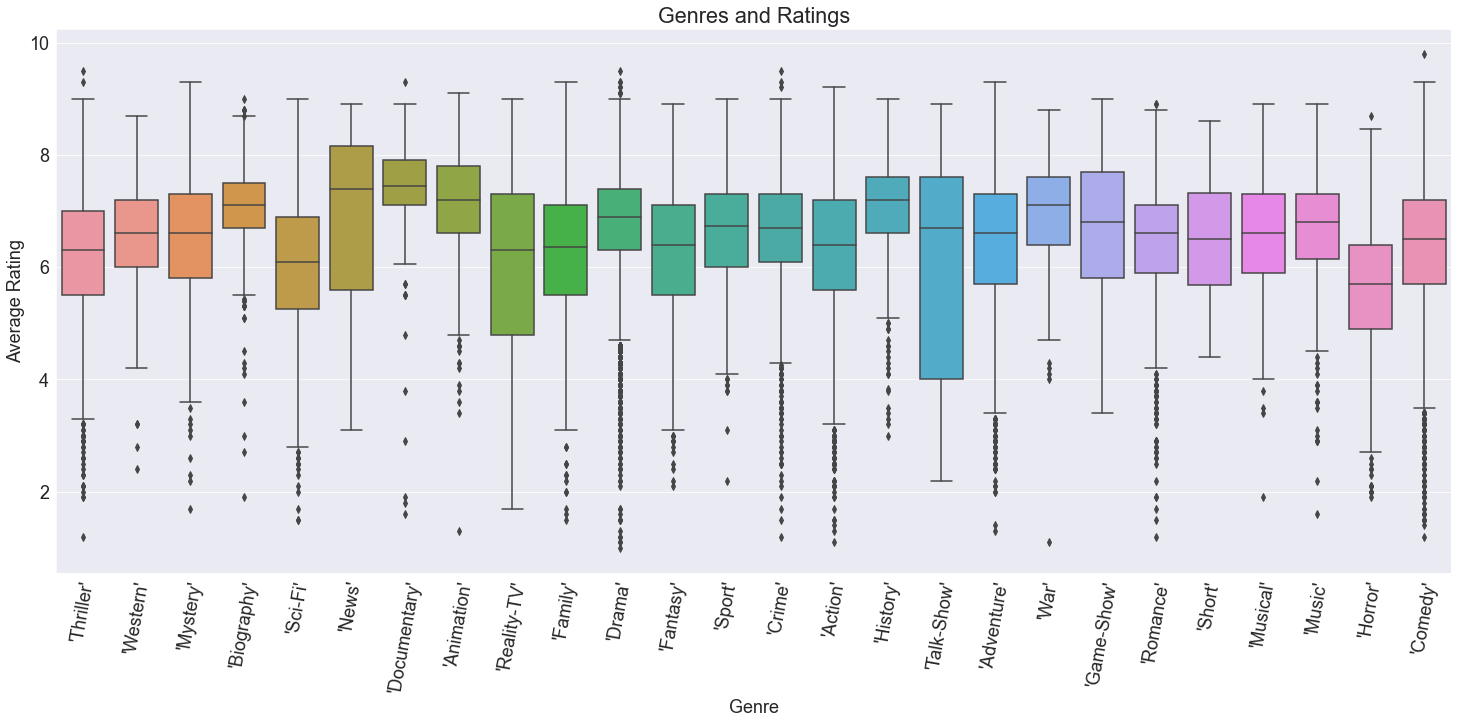

In [95]:
# Get unique genres
unique_genres = set(genres['genre1'].unique().tolist() + genres['genre2'].unique().tolist() + genres['genre3'].unique().tolist())
unique_genres.discard(None)

# Group by genre and extract ratings as arrays
genre_ratings = []
for genre in unique_genres:
    ratings = genres.loc[(genres['genre1'] == genre) | (genres['genre2'] == genre) | (genres['genre3'] == genre), 'rating'].values
    genre_ratings.append(ratings)

plt.figure(figsize=(25, 10))
sns.boxplot(data=genre_ratings)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Genres and Ratings')
plt.gca().set_xticklabels(unique_genres)
plt.xticks(rotation = 80)
plt.show()